# ANN with fashion MNIST Dataset

Link to Fashion MNIST dataset in Kaggle:  
https://www.kaggle.com/datasets/zalando-research/fashionmnist

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import DataLoader, Dataset
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [27]:
# reading the test data
train = pd.read_csv("./fmnist-dataset/fashion-mnist_train.csv")
test = pd.read_csv("./fmnist-dataset/fashion-mnist_test.csv")


In [28]:
# setting random seed for reproducibility
torch.manual_seed(42)

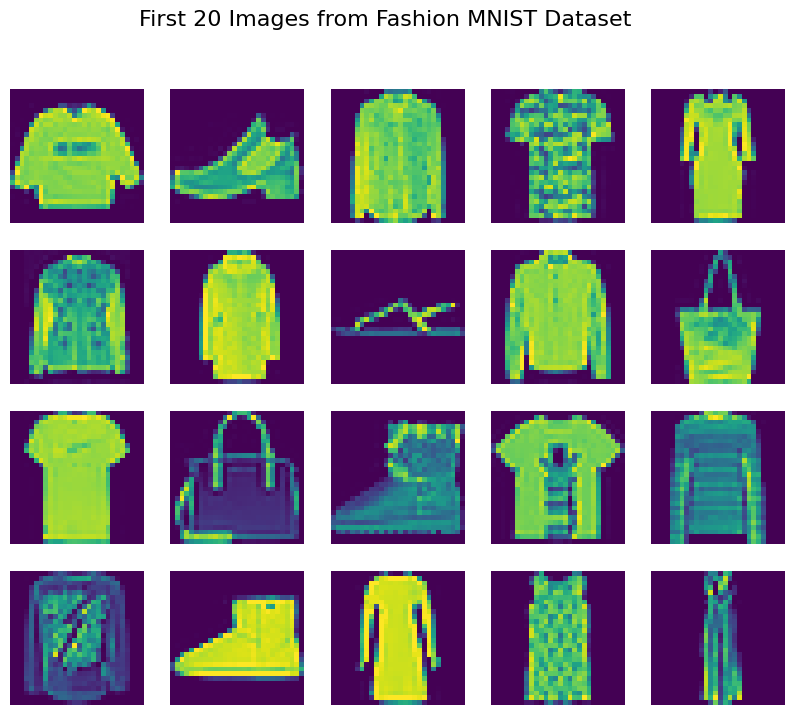

In [ ]:
# visually seeing first 20  images from fashion MNIST dataset
fig, axes = plt.subplots(4, 5, figsize=(10, 8))
fig.suptitle("First 20 Images from Fashion MNIST Dataset", fontsize=16)

for i, ax in enumerate(axes.flat):
    img = X_train.iloc[i, 1:].values.reshape(28, 28) # reshape the image back to 28 *28
    ax.imshow(img)
    ax.axis("off")

In [ ]:
# getting parameters and target and splitting into train and test sets
X_train = train.iloc[:, 1:].values
y_train = train.iloc[:, 0].values
X_test = test.iloc[:, 1:].values
y_test = test.iloc[:, 0].values

In [32]:
# scaling the data
X_train = X_train / 255.0
X_test = X_test / 255.0

In [36]:
# create  CustomDataset class
class CustomDataset(Dataset):
    def __init__(self, features, labels):
        self.features = torch.tensor(features, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.long)
        
    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]


In [40]:
# create train  and test dataset object
train_dataset = CustomDataset(X_train, y_train)
test_dataset = CustomDataset(X_test, y_test)

In [ ]:
# create train and test loader
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)
